Bottom Left Points of Rectangle: 1 3
Height of Rectangle: 9
Width of Rectangle: 7
Enter number of Lines: 5
Initial Point: 1 1
Final Point: 5 8
Initial Point: 2 1
Final Point: 5 7
Initial Point: 1 0
Final Point: 7 8
Initial Point: 4 2
Final Point: 6 6
Initial Point: 5 1
Final Point: 3 7


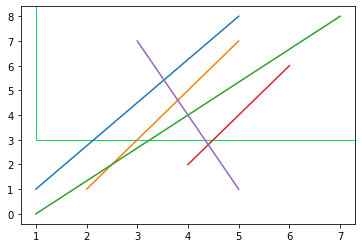

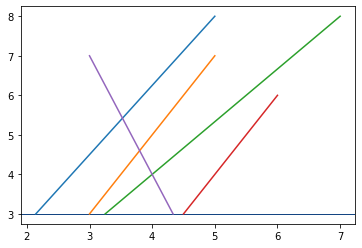

In [1]:
import matplotlib.pyplot as plt
from numpy.random import rand


# Code - TBRL
TOP = 8
BOTTOM = 4
RIGHT = 2
LEFT = 1

def getCode(x, y):
    code = 0
    if x < x_min:
        code |= LEFT
    elif x > x_max:
        code |= RIGHT
    if y < y_min:
        code |= BOTTOM
    elif y > y_max:
        code |= TOP
    return code

def cohenSutherlandAlgo(x1, y1, x2, y2):
    X, Y = [], []
    codeInitial = getCode(x1, y1)
    codeFinal = getCode(x2, y2)
    flag = False

    while (True):
        if (codeInitial or codeFinal) == 0:
            flag = True
            break
        if (codeInitial and codeFinal) != 0:
            break
        if codeInitial != 0:
            code_outside = codeInitial
        else:
            code_outside = codeFinal

        slope = (y2 - y1) / (x2 - x1)
        if code_outside & TOP:
            x = x1 + (1 / slope) * (y_max - y1)
            y = y_max

        elif code_outside & BOTTOM:
            x = x1 + (1 / slope) * (y_min - y1)
            y = y_min

        elif code_outside & RIGHT:
            y = y1 + slope * (x_max - x1)
            x = x_max

        elif code_outside & LEFT:
            y = y1 + slope * (x_min - x1)
            x = x_min

        if code_outside == codeInitial:
            x1 = x
            y1 = y
            codeInitial = getCode(x1, y1)
        else:
            x2 = x
            y2 = y
            codeFinal = getCode(x2, y2)

    if flag:
        X.append(x1)
        X.append(x2)
        Y.append(y1)
        Y.append(y2)

    return X, Y


x, y = map(int, input("Bottom Left Points of Rectangle: ").split())
height = int(input("Height of Rectangle: "))
width = int(input("Width of Rectangle: "))

x_min, y_min = x, y
x_max, y_max = width, height

n = int(input("Enter number of Lines: "))
X, Y = [], []
for i in range(n):
    x1, y1 = map(int, input("Initial Point: ").split())
    x2, y2 = map(int, input("Final Point: ").split())
    X.append(x1)
    X.append(x2)
    Y.append(y1)
    Y.append(y2)

    plt.plot([x1, x2], [y1, y2])
color = (rand(), rand(), rand())
rect = plt.Rectangle((x, y), width, height, edgecolor=color, fill=False)
plt.gca().add_patch(rect)
plt.show()
i = 0
while i < len(X) - 1:
    X_final, Y_final = cohenSutherlandAlgo(X[i], Y[i], X[i + 1], Y[i + 1])
    plt.plot(X_final, Y_final)
    i += 2

color = (rand(), rand(), rand())
rect = plt.Rectangle((x, y), width, height, edgecolor=color, fill=False)
plt.gca().add_patch(rect)
plt.show()